### Import the necessary package

In [2]:
import sys
sys.path.insert(0, '../')

import os
import pandas as pd
import utilities as utils
import matplotlib.pyplot as plt
from random import randint
from dotenv import load_dotenv

load_dotenv()

True

### Global variables

In [3]:
# store the path
path_full = os.environ.get("ORI_PATH")
path_mask = os.path.join(path_full, "datasets", "cleaned", "mask_image")
path_data = os.path.join(path_full, "data")

### Get the mask image list and information

In [4]:
# get the list of mask images
mask_images = os.listdir(path_mask)
cdr_data = pd.DataFrame(data=mask_images, columns=["id"])

# extract the information from the file name
cdr_data["path"] = cdr_data["id"].apply(lambda x: os.path.join(path_mask, x))
cdr_data["id"] = cdr_data["id"].apply(lambda x: x.split(".")[0])
cdr_data["label"] = cdr_data["id"].apply(lambda x: x.split("_")[1])
cdr_data["eye_side"] = cdr_data["id"].apply(lambda x: x.split("_")[3])

cdr_data.drop(columns=['path']).head(5)

,id,label,eye_side
0,fff_0_111784_l_y_mask,0,l
1,fff_0_111784_r_y_mask,0,r
2,fff_0_113060_l_1_mask,0,l
3,fff_0_113060_l_2_mask,0,l
4,fff_0_113060_l_3_mask,0,l


### Visualize the mask image

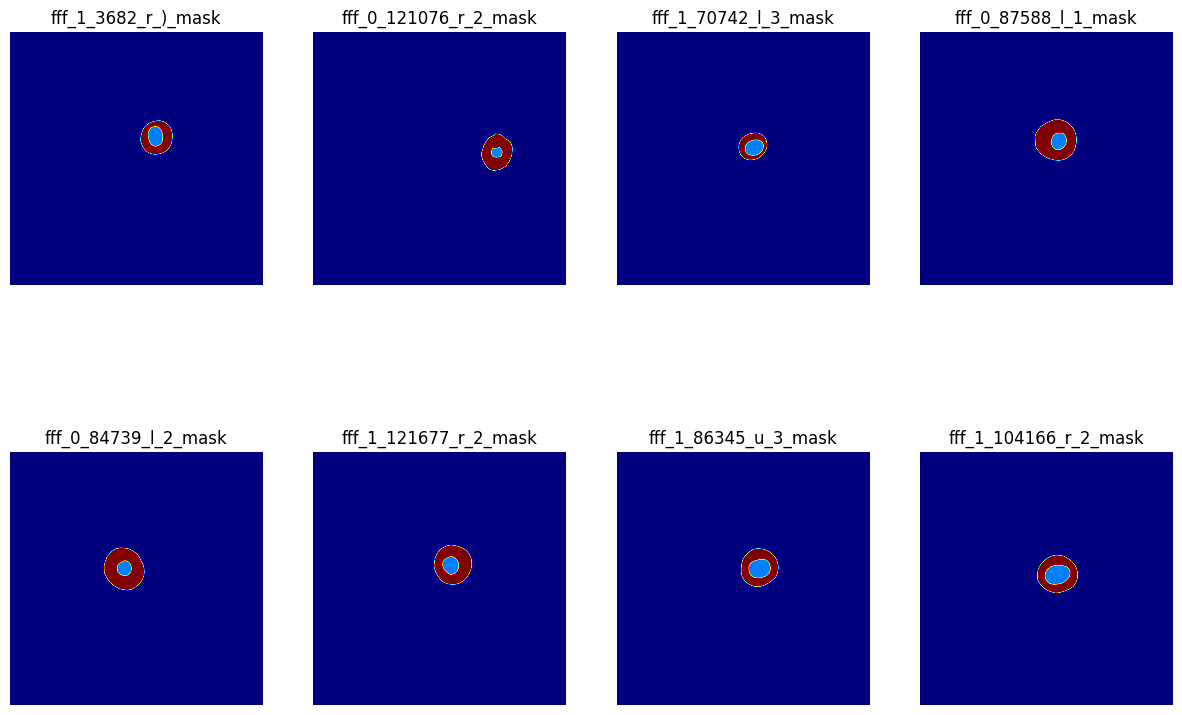

In [5]:
# configure the visualizations
plt.figure(figsize=(15, 10))
fig_rows = 2
fig_cols = 4
# plot the images
for i in range(fig_rows * fig_cols):
    # get a random mask image
    choice = randint(0, len(cdr_data))
    # plot the mask image
    plt.subplot(fig_rows,fig_cols, i+1)
    plt.imshow(plt.imread(cdr_data["path"][choice]), cmap='jet')
    plt.title(cdr_data["id"][choice])
    plt.axis('off')

### Count CDR

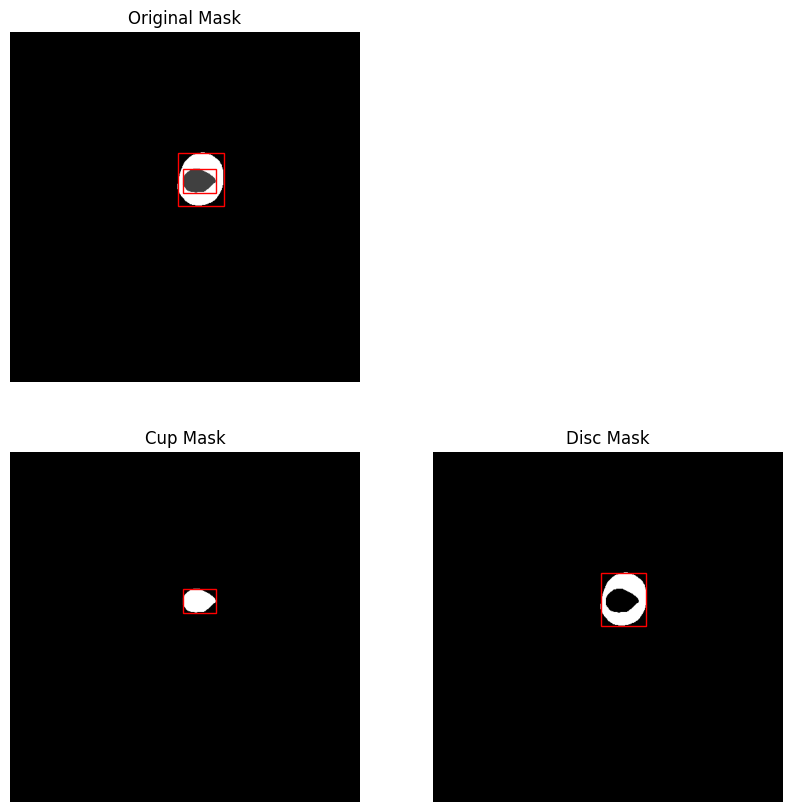

{'Area CDR': 0.42857142857142855, 'Horizontal CDR': 0.7164179104477612, 'Vertical CDR': 0.44871794871794873}


In [6]:
print(utils.count_dataset_cdr(cdr_data['path'][randint(0, len(cdr_data))], True))

In [7]:
for mask_row in cdr_data.iterrows():
    cdr = utils.count_dataset_cdr(mask_row[1]['path'])
    cdr_data.loc[mask_row[0], 'a_cdr'] = cdr["Area CDR"]
    cdr_data.loc[mask_row[0], 'v_cdr'] = cdr["Vertical CDR"]
    cdr_data.loc[mask_row[0], 'h_cdr'] = cdr["Horizontal CDR"]

In [8]:
cdr_data.drop(columns=["path"]).to_csv(os.path.join(path_data, "cdr_dataset.csv"), index=False)